<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S3_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3
## Structural characterization of vertices, edges, and graphs

Vertices: PageRank

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import powerlaw_cluster_graph

In [17]:
G = powerlaw_cluster_graph(30, 3, 0.05)
coords = nx.spectral_layout(G)
rank = nx.pagerank(G) # default damping
print(list(rank.items())[:3])

[(0, 0.05269426632965006), (1, 0.04126601302553291), (2, 0.04784396674227566)]


In [4]:
from math import log

# normalize to [0, 1] and logscale
low = min(rank.values())
high = max(rank.values())
span = high - low
rank = [ log((rank[v] - low) / span + 1) for v in G.nodes() ]

In [5]:
opt = { 'node_size': 200,
        'width': 3,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'orange' }

(-1.075016129421205,
 0.8605914211207538,
 -1.0408053959675199,
 1.1939226846846964)

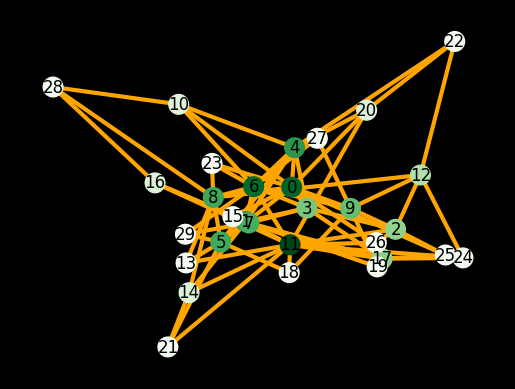

In [6]:
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Greens'), # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        node_color = [ rank[v] for v in G.nodes() ], **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

Edges: Betweenness

In [7]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G)
print(list(centrality.items())[:3])

[((0, 3), 0.020523710006468625), ((0, 4), 0.019431673052362708), ((0, 5), 0.03301346801346801)]


In [8]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
span = high - low
weight = [(centrality[e] - low) / span for e in G.edges()]

(-1.075016129421205,
 0.8605914211207538,
 -1.0408053959675199,
 1.1939226846846964)

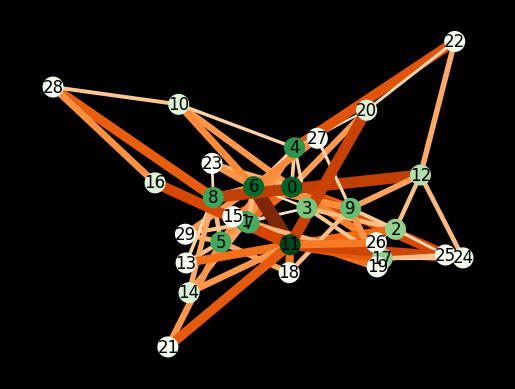

In [9]:
del opt['width'] # discard
width = 10 # set a maximum
del opt['edge_color']
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Greens'),
        edge_cmap = plt.get_cmap('Oranges'),
        node_color = rank,
        edge_color = weight,
        width = [width * w for w in weight] ,
        **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

Graphs: connected components

In [23]:
from random import choice

Gc = G.copy()
goal = 3 # to how many pieces we wish to break it
n = G.number_of_nodes()
m = G.number_of_edges()

while True:
  broken = choice(list(Gc.nodes))
  Gc.remove_node(broken)
  nNow = Gc.number_of_nodes()
  mNow = Gc.number_of_edges()
  print(f'{nNow} vertices, down from {n}')
  print(f'{mNow} edges, down from {m}')
  comp = [ cc for cc in nx.connected_components(Gc) ]
  pieces = len(comp)
  if pieces == 1:
    avgd = nx.average_shortest_path_length(Gc)
    print(f'Avg distance now at {avgd:.2f}')
  elif pieces >= goal:
    break

13 vertices, down from 14
14 edges, down from 15
12 vertices, down from 14
13 edges, down from 15
11 vertices, down from 14
9 edges, down from 15


In [24]:
cc = nx.connected_components(Gc)
for comp in cc:
  print(len(comp))

8
2
1


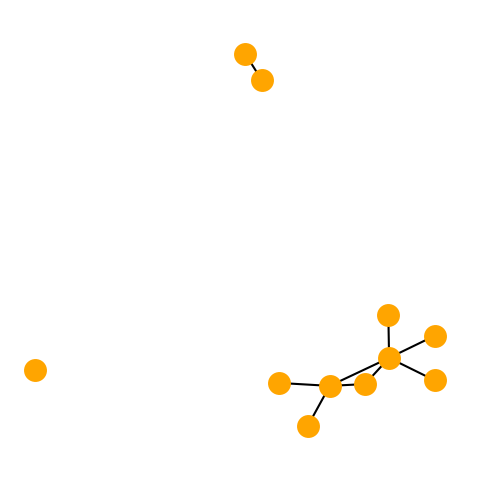

In [27]:
fig = plt.figure(1, figsize = (3, 3), dpi =  150)
nx.draw(Gc, pos = nx.spring_layout(Gc), node_size = 100, node_color = 'orange')